In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
print(os.path.exists('/content/drive/MyDrive/Colab Notebooks/ChatGPT-promises-and-pitfalls-main/humanCode'))


True


In [25]:
!pip install radon


In [26]:
!python "/content/drive/MyDrive/Colab Notebooks/ChatGPT-promises-and-pitfalls-main/metrics.py"

In [27]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ChatGPT-promises-and-pitfalls-main/data/humanCodeMetrics.csv")
df.head()


,File,Category,Subcategory,More Accurate/Less Accurate,Cyclomatic Complexity,SLoC,Halstead Distinct Operators,Halstead Distinct Operands,Comments
0,takes-a-file-and-a-line-number-and-prints-the-...,data-analysis,data-storage,more,2,6,1,2,1
1,compresses-and-decompresses-a-text-file.py,data-analysis,data-storage,more,2,16,1,2,0
2,takes-a-json-file-and-reads-it-into-the-progra...,data-analysis,data-storage,more,2,8,0,0,1
3,converts-a-csv-file-to-a-json-file.py,data-analysis,data-storage,more,3,11,1,2,1
4,generates-some-amount-of-random-numbers-and-st...,data-analysis,data-storage,more,2,10,0,0,1


In [34]:
#Prepare the dataset
import pandas as pd

# Load CSV files
human_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ChatGPT-promises-and-pitfalls-main/data/humanCodeMetrics.csv')
chatgpt_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ChatGPT-promises-and-pitfalls-main/data/3.5metrics.csv')

# Add labels
human_df['Label'] = 0       # Human-generated code
chatgpt_df['Label'] = 1     # ChatGPT-generated code



In [35]:
# Combine datasets
df = pd.concat([human_df, chatgpt_df], ignore_index=True)

In [36]:
# Inspect combined data
df.head()


,File,Category,Subcategory,More Accurate/Less Accurate,Cyclomatic Complexity,SLoC,Halstead Distinct Operators,Halstead Distinct Operands,Comments,Label,Notes
0,takes-a-file-and-a-line-number-and-prints-the-...,data-analysis,data-storage,more,2,6,1,2,1,0,NaN
1,compresses-and-decompresses-a-text-file.py,data-analysis,data-storage,more,2,16,1,2,0,0,NaN
2,takes-a-json-file-and-reads-it-into-the-progra...,data-analysis,data-storage,more,2,8,0,0,1,0,NaN
3,converts-a-csv-file-to-a-json-file.py,data-analysis,data-storage,more,3,11,1,2,1,0,NaN
4,generates-some-amount-of-random-numbers-and-st...,data-analysis,data-storage,more,2,10,0,0,1,0,NaN


In [40]:
#Define Features and Labels
X = df.drop(['File', 'Category', 'Subcategory', 'More Accurate/Less Accurate', 'Label', 'Notes'], axis=1)
y = df['Label']

In [41]:
print(X.head())

   Cyclomatic Complexity  SLoC  Halstead Distinct Operators  \
0                      2     6                            1   
1                      2    16                            1   
2                      2     8                            0   
3                      3    11                            1   
4                      2    10                            0   

   Halstead Distinct Operands  Comments  
0                           2         1  
1                           2         0  
2                           0         1  
3                           2         1  
4                           0         1  


In [42]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64


In [43]:
# Train-Test Split & Normalize Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#Neural Network Model (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=8,
    validation_data=(X_test, y_test)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.4921 - loss: 0.6913 - val_accuracy: 0.6226 - val_loss: 0.6768
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5271 - loss: 0.6777 - val_accuracy: 0.6038 - val_loss: 0.6720
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5732 - loss: 0.6771 - val_accuracy: 0.6038 - val_loss: 0.6694
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6309 - loss: 0.6605 - val_accuracy: 0.6981 - val_loss: 0.6643
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7278 - loss: 0.6547 - val_accuracy: 0.6415 - val_loss: 0.6618
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6895 - loss: 0.6441 - val_accuracy: 0.5849 - val_loss: 0.6585
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6843 - loss: 0.6495 - val_accuracy: 0.5849 - val_loss: 0.6562
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7471 - loss: 0.6200 - val_accuracy: 0.5849 - val_loss

In [45]:
#Evaluate Your Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2%}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.5922 - loss: 0.7939
Test Accuracy: 62.26%


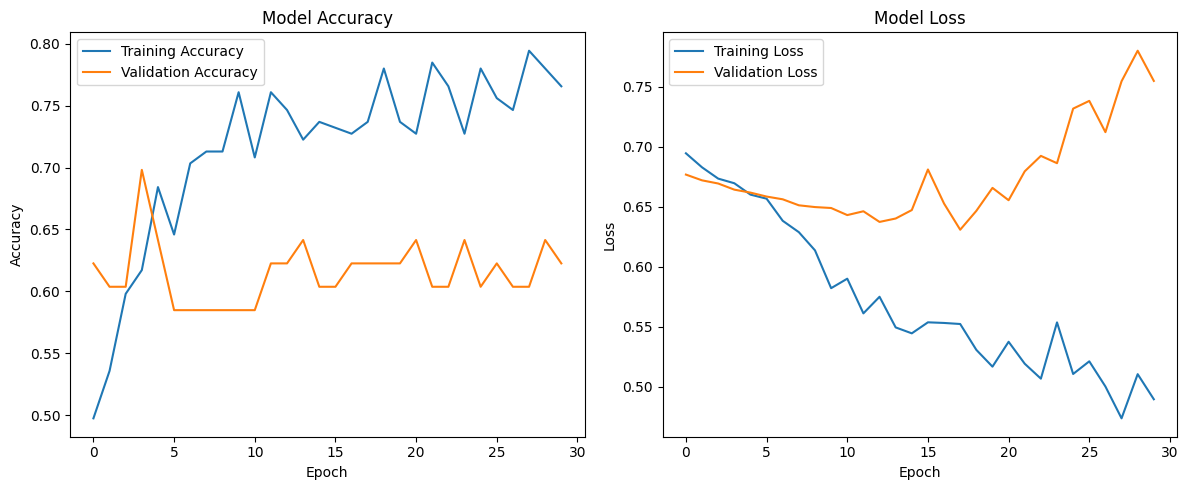

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Human', 'ChatGPT']))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
              precision    recall  f1-score   support

       Human       0.69      0.42      0.52        26
     ChatGPT       0.59      0.81      0.69        27

    accuracy                           0.62        53
   macro avg       0.64      0.62      0.61        53
weighted avg       0.64      0.62      0.61        53

